In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import pairwise_distances
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as PCA_sklearn
from sklearn.metrics import pairwise_kernels

In [14]:
#1.1
file_path = "C:\\Users\\Ays\\Documents\\FAU Fall 24\\CAP 4770 Data Mining\\Kidney.csv"
df = pd.read_csv(file_path)

selected_features = df.columns[:10]

X = df.loc[:, selected_features].values
Y = df.loc[:, df.columns[-1]].values

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

def pca_scratch(X):
    covariance_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

explained_variance_scratch, sorted_eigenvectors = pca_scratch(X_scaled)
cumulative_variance = np.cumsum(explained_variance_scratch) / np.sum(explained_variance_scratch)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")

X_pca_scratch = X_scaled @ sorted_eigenvectors[:, :num_components]
print(f"Explained variance (from scratch): {explained_variance_scratch[:num_components]}")

Number of components to retain 95% variance: 8
Explained variance (from scratch): [1.91872643 1.6545157  1.09594652 1.08787097 0.95820114 0.83562778
 0.66477068 0.42652408]


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [9]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [15]:
#1.2
pca_sklearn = PCA(n_components=num_components)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)

print(f"Explained variance (from scratch): {explained_variance_scratch[:num_components]}")
print(f"Explained variance (scikit-learn): {pca_sklearn.explained_variance_ratio_}")

Explained variance (from scratch): [1.91872643 1.6545157  1.09594652 1.08787097 0.95820114 0.83562778
 0.66477068 0.42652408]
Explained variance (scikit-learn): [0.21205176 0.182852   0.12112065 0.12022816 0.10589745 0.09235102
 0.07346842 0.04713813]


In [16]:
#2.1
def rbf_kernel(X, gamma=1.0):
    pairwise_sq_dists = pairwise_distances(X, metric='sqeuclidean')
    return np.exp(-gamma * pairwise_sq_dists)

def kpca_rbf_scratch(X, num_components, gamma=1.0):
    K = rbf_kernel(X, gamma)
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    X_kpca = eigenvectors_sorted[:, :num_components] * np.sqrt(eigenvalues_sorted[:num_components])
    return X_kpca, eigenvalues_sorted

X_kpca_rbf_scratch, eigenvalues_rbf = kpca_rbf_scratch(X_scaled, num_components=8)

In [17]:
#2.2
def polynomial_kernel(X, degree=3):
    return (X @ X.T) ** degree

def kpca_polynomial_scratch(X, num_components, degree=3):
    K = polynomial_kernel(X, degree)
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    X_kpca = eigenvectors_sorted[:, :num_components] * np.sqrt(eigenvalues_sorted[:num_components])
    return X_kpca, eigenvalues_sorted

X_kpca_polynomial_scratch, eigenvalues_polynomial = kpca_polynomial_scratch(X_scaled, num_components=8)

In [18]:
#2.3
def linear_kernel(X):
    return X @ X.T

def kpca_linear_scratch(X, num_components):
    K = linear_kernel(X)
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    X_kpca = eigenvectors_sorted[:, :num_components] * np.sqrt(eigenvalues_sorted[:num_components])
    return X_kpca, eigenvalues_sorted

X_kpca_linear_scratch, eigenvalues_linear = kpca_linear_scratch(X_scaled, num_components=8)

In [19]:
#2.4
def svd_scratch(X, num_components):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    return U[:, :num_components], S, Vt

X_svd_scratch, S, Vt = svd_scratch(X_scaled, num_components=8)

print(f"Explained variance (PCA): {explained_variance_scratch[:8]}")
print(f"Explained variance (KPCA with RBF): {eigenvalues_rbf[:8]}")
print(f"Explained variance (KPCA with Polynomial): {eigenvalues_polynomial[:8]}")
explained_variance_svd = (S**2) / (X_scaled.shape[0] - 1)
print(f"Explained variance (SVD normalized): {explained_variance_svd[:8]}")


Explained variance (PCA): [1.91872643 1.6545157  1.09594652 1.08787097 0.95820114 0.83562778
 0.66477068 0.42652408]
Explained variance (KPCA with RBF): [3.69856143 2.70285038 2.46675542 2.00321966 1.87965191 1.77011182
 1.63895033 1.57725225]
Explained variance (KPCA with Polynomial): [217810.7241953  138311.11083886 100911.37808943  74501.33154707
  37301.88990513  25350.62952496  22525.19665496  21416.15396266]
Explained variance (SVD normalized): [1.91872643 1.6545157  1.09594652 1.08787097 0.95820114 0.83562778
 0.66477068 0.42652408]


In [20]:
#3.1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print(f"X_train shape after imputation: {X_train_imputed.shape}")
print(f"X_test shape after imputation: {X_test_imputed.shape}")

pca_sklearn = PCA(n_components=8)
pca_sklearn.fit(X_train_imputed)

X_test_pca = pca_sklearn.transform(X_test_imputed)

X_test_kpca_rbf, _ = kpca_rbf_scratch(X_test_imputed, num_components=8)
X_test_kpca_polynomial, _ = kpca_polynomial_scratch(X_test_imputed, num_components=8)
X_test_kpca_linear, _ = kpca_linear_scratch(X_test_imputed, num_components=8)

svd_output = svd_scratch(X_test_imputed, num_components=8)

if isinstance(svd_output, tuple):
    X_test_svd = svd_output[0]
else:
    X_test_svd = svd_output

print(f"X_test PCA shape: {X_test_pca.shape}")
print(f"X_test KPCA (RBF) shape: {X_test_kpca_rbf.shape}")
print(f"X_test KPCA (Polynomial) shape: {X_test_kpca_polynomial.shape}")
print(f"X_test KPCA (Linear) shape: {X_test_kpca_linear.shape}")
print(f"X_test SVD shape: {X_test_svd.shape}")

X_train shape after imputation: (149, 9)
X_test shape after imputation: (38, 9)
X_test PCA shape: (38, 8)
X_test KPCA (RBF) shape: (38, 8)
X_test KPCA (Polynomial) shape: (38, 8)
X_test KPCA (Linear) shape: (38, 8)
X_test SVD shape: (38, 8)


In [21]:
#3.2
def evaluate_classifier(X_train, y_train, X_test, y_test):
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

best_accuracy_pca = 0
best_n_components_pca = 0
for n in range(1, min(X_train_imputed.shape[1], 21)):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_imputed)
    X_test_pca = pca.transform(X_test_imputed)
    accuracy = evaluate_classifier(X_train_pca, y_train, X_test_pca, y_test)
    
    if accuracy > best_accuracy_pca:
        best_accuracy_pca = accuracy
        best_n_components_pca = n

best_accuracy_kpca_rbf = 0
best_n_components_kpca_rbf = 0
for n in range(1, min(X_train_imputed.shape[1], 21)):
    kpca_rbf = KernelPCA(kernel='rbf', n_components=n)
    X_train_kpca_rbf = kpca_rbf.fit_transform(X_train_imputed)
    X_test_kpca_rbf = kpca_rbf.transform(X_test_imputed)
    accuracy = evaluate_classifier(X_train_kpca_rbf, y_train, X_test_kpca_rbf, y_test)

    if accuracy > best_accuracy_kpca_rbf:
        best_accuracy_kpca_rbf = accuracy
        best_n_components_kpca_rbf = n

best_accuracy_kpca_polynomial = 0
best_n_components_kpca_polynomial = 0
for n in range(1, min(X_train_imputed.shape[1], 21)):
    kpca_polynomial = KernelPCA(kernel='poly', n_components=n)
    X_train_kpca_polynomial = kpca_polynomial.fit_transform(X_train_imputed)
    X_test_kpca_polynomial = kpca_polynomial.transform(X_test_imputed)
    accuracy = evaluate_classifier(X_train_kpca_polynomial, y_train, X_test_kpca_polynomial, y_test)

    if accuracy > best_accuracy_kpca_polynomial:
        best_accuracy_kpca_polynomial = accuracy
        best_n_components_kpca_polynomial = n

best_accuracy_kpca_linear = 0
best_n_components_kpca_linear = 0
for n in range(1, min(X_train_imputed.shape[1], 21)):
    kpca_linear = KernelPCA(kernel='linear', n_components=n)
    X_train_kpca_linear = kpca_linear.fit_transform(X_train_imputed)
    X_test_kpca_linear = kpca_linear.transform(X_test_imputed)
    accuracy = evaluate_classifier(X_train_kpca_linear, y_train, X_test_kpca_linear, y_test)

    if accuracy > best_accuracy_kpca_linear:
        best_accuracy_kpca_linear = accuracy
        best_n_components_kpca_linear = n

best_accuracy_svd = 0
best_n_components_svd = 0
for n in range(1, min(X_train_imputed.shape[1], 21)):
    svd = TruncatedSVD(n_components=n)
    X_train_svd = svd.fit_transform(X_train_imputed)
    X_test_svd = svd.transform(X_test_imputed)
    accuracy = evaluate_classifier(X_train_svd, y_train, X_test_svd, y_test)

    if accuracy > best_accuracy_svd:
        best_accuracy_svd = accuracy
        best_n_components_svd = n

print(f"Best accuracy (PCA): {best_accuracy_pca} with {best_n_components_pca} components")
print(f"Best accuracy (KPCA RBF): {best_accuracy_kpca_rbf} with {best_n_components_kpca_rbf} components")
print(f"Best accuracy (KPCA Polynomial): {best_accuracy_kpca_polynomial} with {best_n_components_kpca_polynomial} components")
print(f"Best accuracy (KPCA Linear): {best_accuracy_kpca_linear} with {best_n_components_kpca_linear} components")
print(f"Best accuracy (SVD): {best_accuracy_svd} with {best_n_components_svd} components")

Best accuracy (PCA): 0.7368421052631579 with 8 components
Best accuracy (KPCA RBF): 0.8157894736842105 with 5 components
Best accuracy (KPCA Polynomial): 0.7894736842105263 with 5 components
Best accuracy (KPCA Linear): 0.7368421052631579 with 8 components
Best accuracy (SVD): 0.7368421052631579 with 8 components


X_pca_sklearn shape: (149, 9)
y_train shape: (149,)


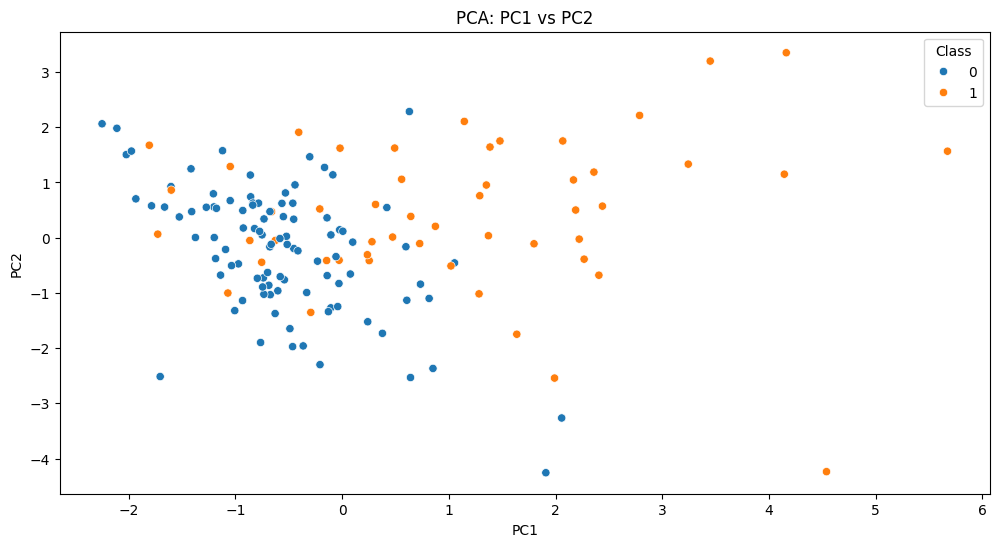

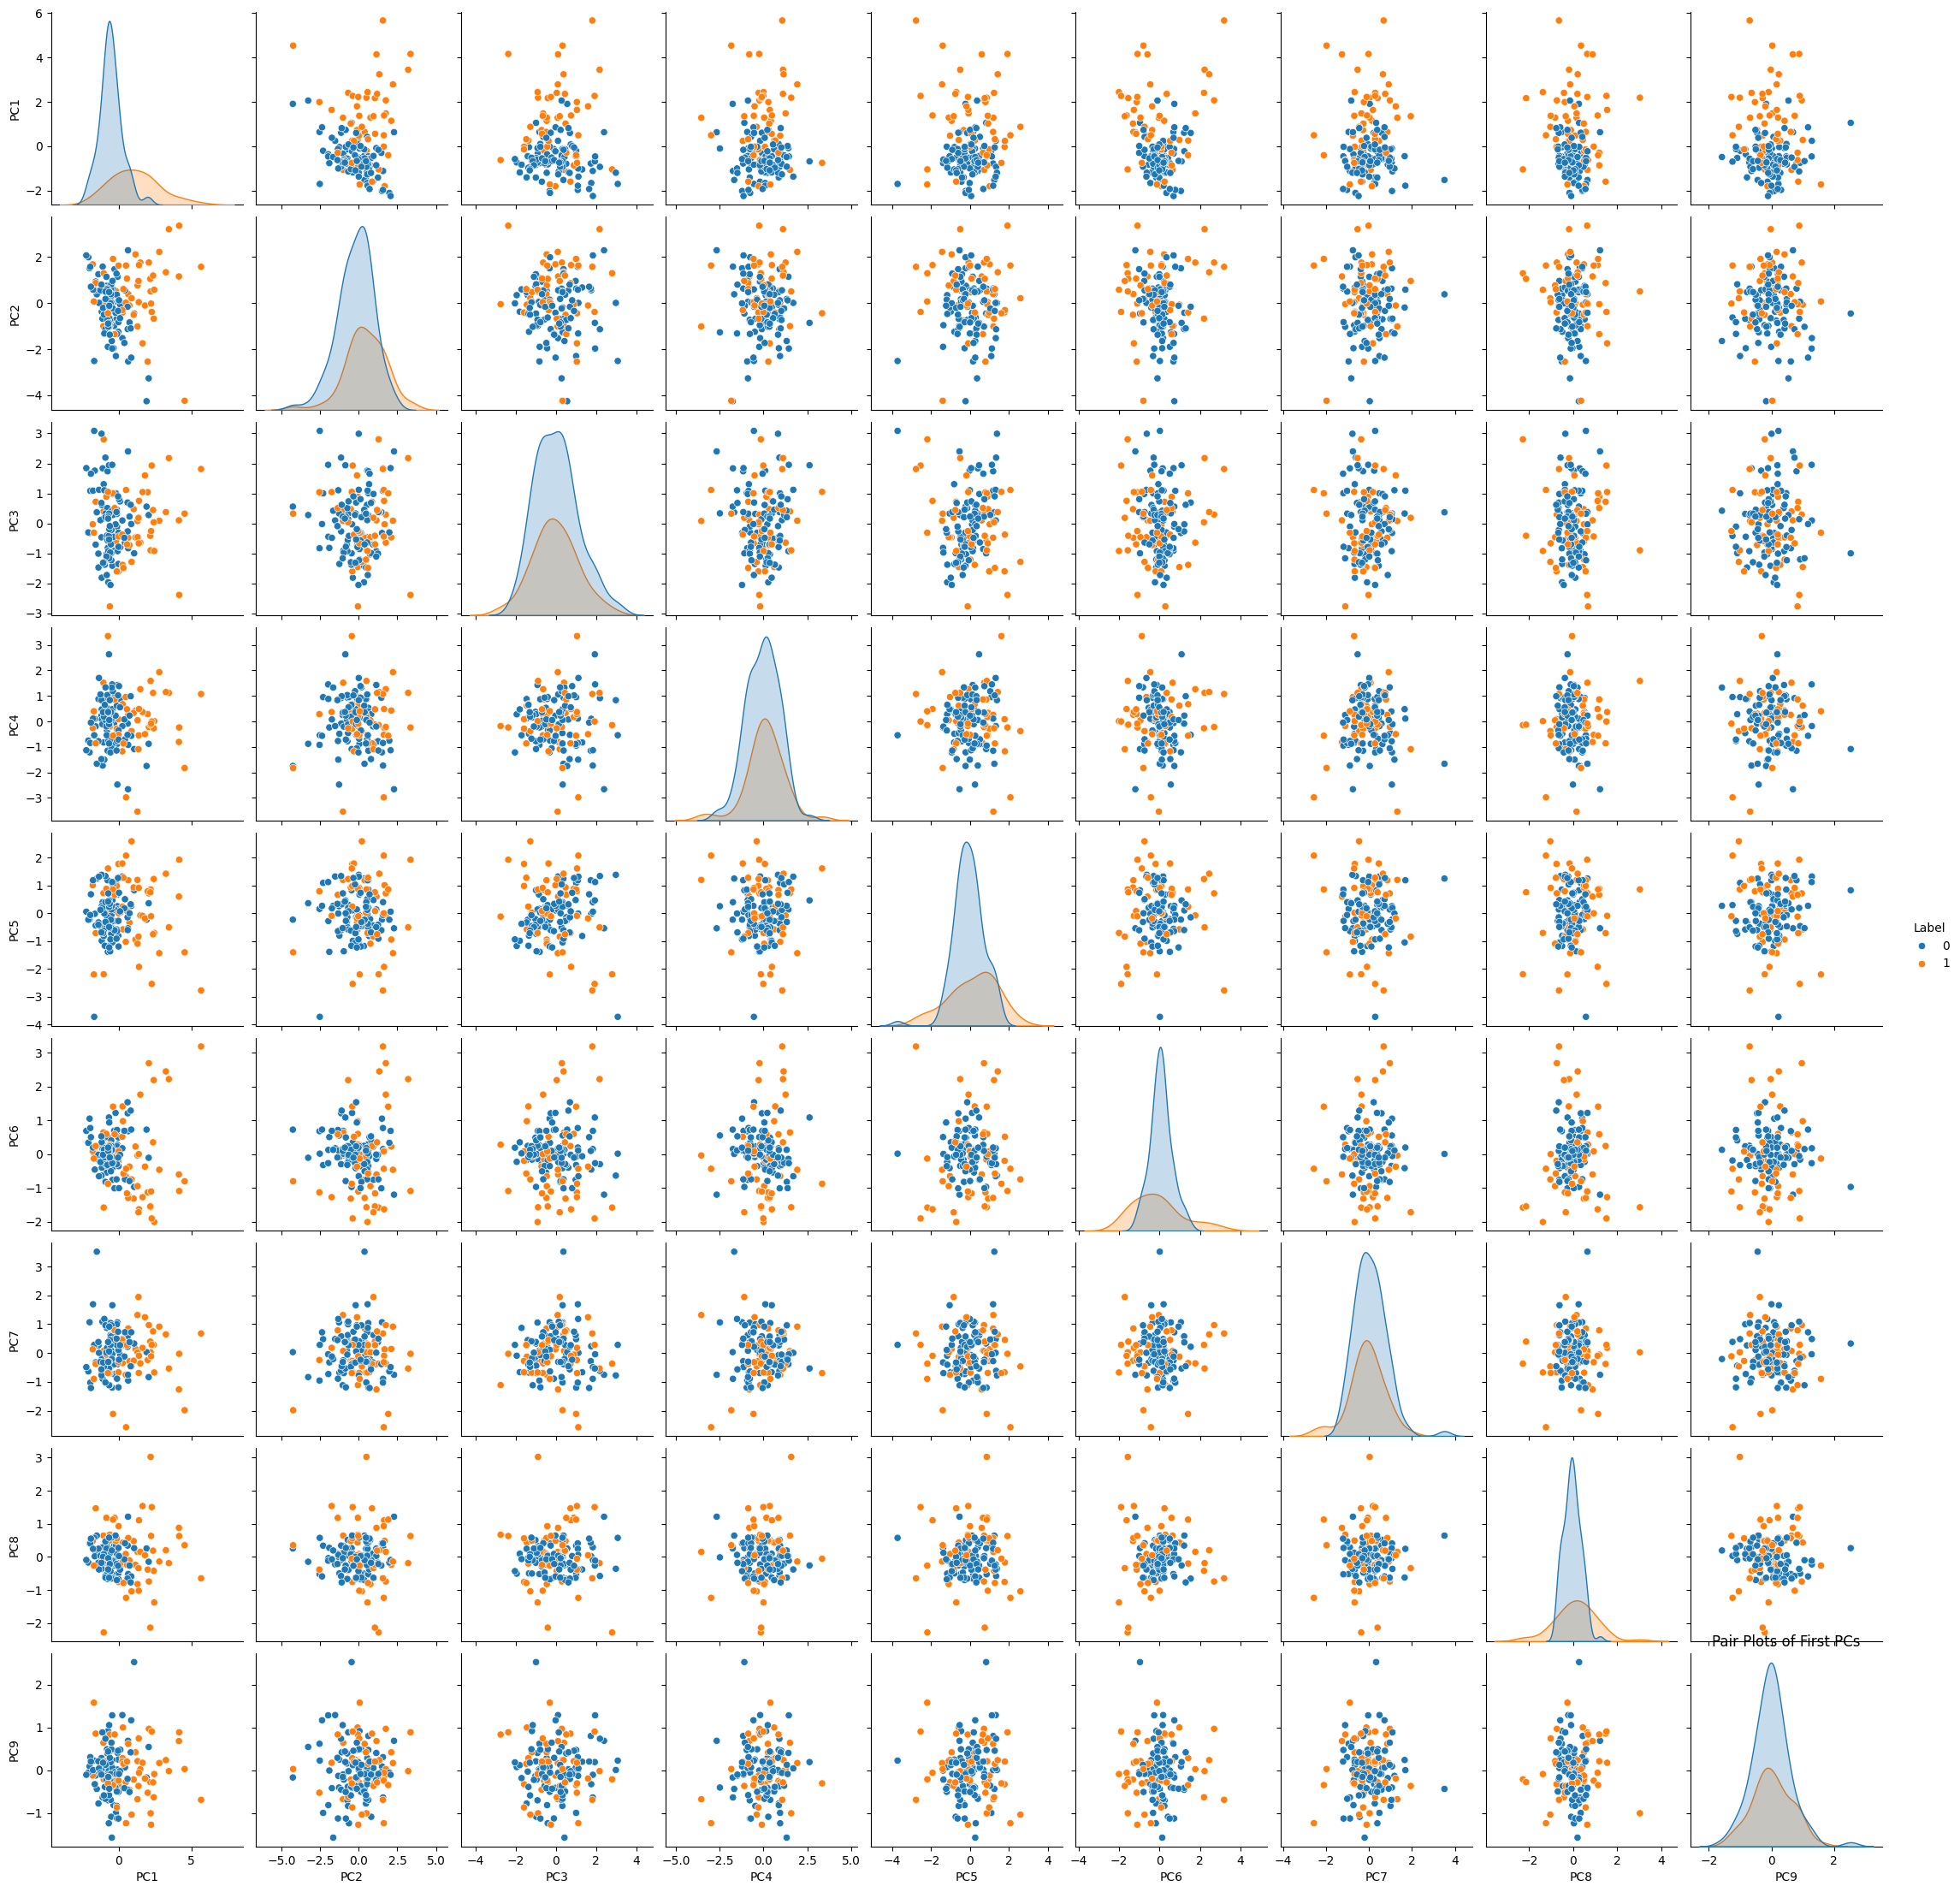

In [22]:
#3.3
num_features = X_train.shape[1]
num_components = min(10, num_features)

pca = PCA(n_components=num_components)
X_pca_sklearn = pca.fit_transform(X_train)

print(f'X_pca_sklearn shape: {X_pca_sklearn.shape}')
print(f'y_train shape: {y_train.shape}')

if num_components >= 2:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X_pca_sklearn[:, 0], y=X_pca_sklearn[:, 1], hue=y_train)
    plt.title('PCA: PC1 vs PC2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Class')
    plt.show()

if num_components > 1:
    pairplot_data = pd.DataFrame(X_pca_sklearn[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])
    pairplot_data['Label'] = y_train

    sns.pairplot(pairplot_data, hue='Label')
    plt.title('Pair Plots of First PCs')
    plt.show()

c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

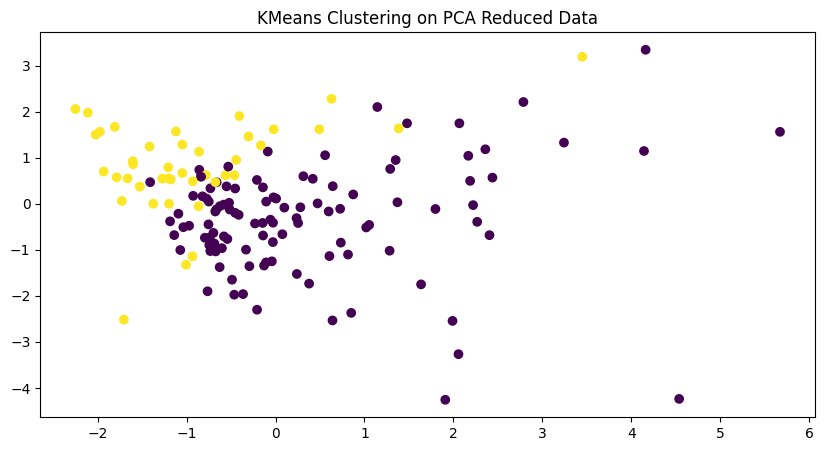

In [23]:
#4.1
def kmeans_clustering(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(X)

def kernel_kmeans_clustering(X, n_clusters=2, kernel='rbf', max_iter=300):
    n_samples = X.shape[0]
    labels = np.random.randint(0, n_clusters, size=n_samples)
    for _ in range(max_iter):
        K = pairwise_kernels(X, metric=kernel)
        for i in range(n_clusters):
            mask = (labels == i)
            if np.any(mask):
                centroids = np.mean(K[mask][:, mask], axis=1)
                labels[mask] = np.argmin(np.abs(K[mask][:, mask] - centroids[:, None]), axis=1)
    return labels

def em_clustering(X, n_clusters=2):
    em = GaussianMixture(n_components=n_clusters, random_state=42)
    return em.fit_predict(X)

clusters_pca = kmeans_clustering(X_pca_sklearn)
clusters_kpca_rbf = kmeans_clustering(X_kpca_rbf_scratch)
clusters_kpca_polynomial = kmeans_clustering(X_kpca_polynomial_scratch)
clusters_kpca_linear = kmeans_clustering(X_kpca_linear_scratch)

clusters_em_pca = em_clustering(X_pca_sklearn)
clusters_em_kpca_rbf = em_clustering(X_kpca_rbf_scratch)
clusters_em_kpca_polynomial = em_clustering(X_kpca_polynomial_scratch)
clusters_em_kpca_linear = em_clustering(X_kpca_linear_scratch)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=clusters_pca, cmap='viridis')
plt.title('KMeans Clustering on PCA Reduced Data')
plt.show()


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


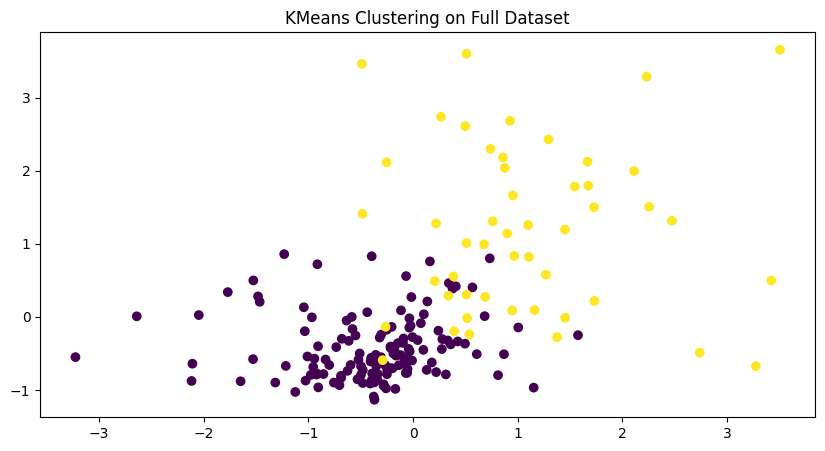

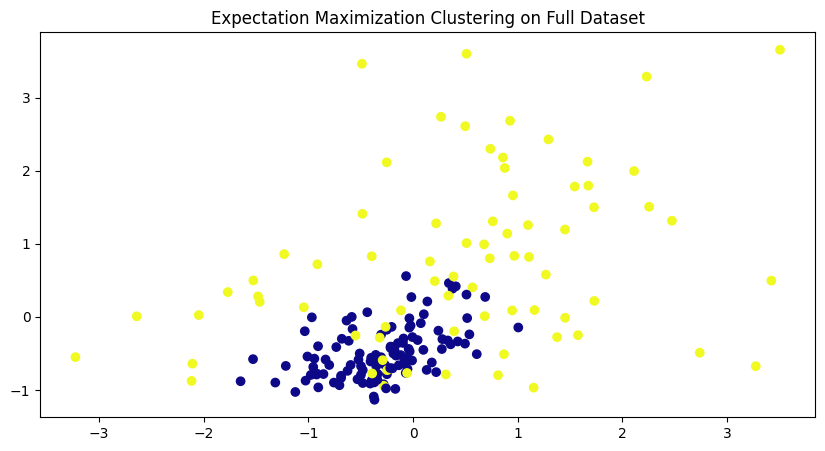

In [24]:
#4.2
clusters_full = kmeans_clustering(X_scaled)
clusters_full_kernel = kernel_kmeans_clustering(X_scaled)
clusters_em_full = em_clustering(X_scaled)

plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_full, cmap='viridis')
plt.title('KMeans Clustering on Full Dataset')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_em_full, cmap='plasma')
plt.title('Expectation Maximization Clustering on Full Dataset')
plt.show()
